In [1]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
from sklearn import preprocessing #предобработка
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
print(df.shape)

(1338, 7)


In [4]:
display(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
display(df.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [8]:
data = df.copy()

In [9]:
data['smoker'] = data['smoker'].apply(lambda x: 0 if x == 'no' else 1)
data['sex'] = data['sex'].apply(lambda x: 0 if x == 'female' else 1)
#оставшиеся категориальные признаки кодируем с помощью OneHot
data = pd.get_dummies(data)
data.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [10]:
features = data.drop('charges', axis=1).columns
X = data[features]
y = data['charges']

In [11]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test.shape

(268, 9)

In [17]:
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train)
print(round(lr_model.intercept_, 2))

-12390.8


In [19]:
y_train_predict = lr_model.predict(X_train)
y_test_predict = lr_model.predict(X_test)

print('MAE train: {}'.format(round(metrics.mean_absolute_error(y_train, y_train_predict))))
print('MAPE train: {}'.format(round(metrics.mean_absolute_percentage_error(y_train, y_train_predict)*100)))
print('R2 train: {:.3f}'.format(metrics.r2_score(y_train, y_train_predict)))
print()
print('MAE test: {}'.format(round(metrics.mean_absolute_error(y_test, y_test_predict))))
print('MAPE test: {}'.format(round(metrics.mean_absolute_percentage_error(y_test, y_test_predict)*100)))
print('R2 test: {:.3f}'.format(metrics.r2_score(y_test, y_test_predict)))

MAE train: 4208
MAPE train: 42
R2 train: 0.742

MAE test: 4181
MAPE test: 47
R2 test: 0.784


c:\Users\Anna\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<AxesSubplot: >

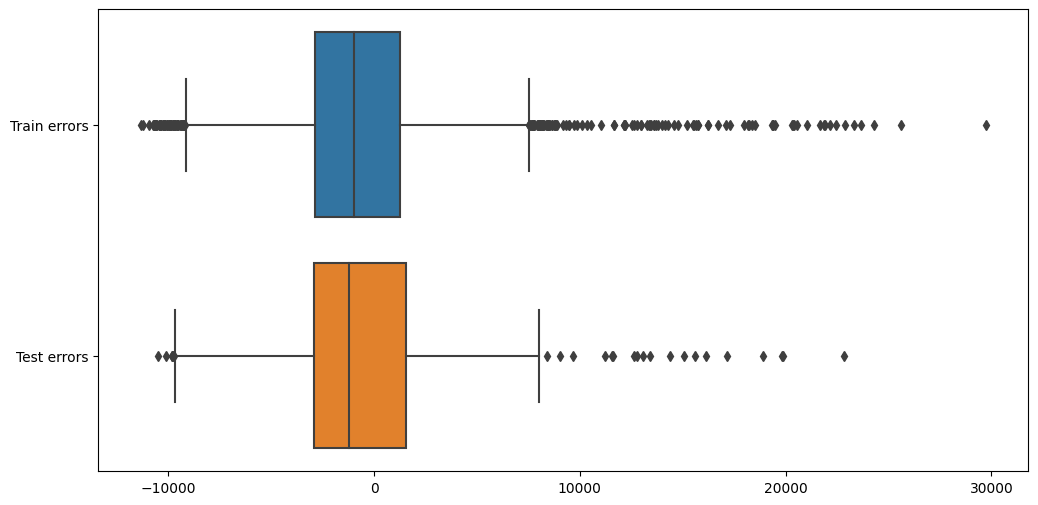

In [20]:
fig, ax = plt.subplots(figsize=(12, 6))
y_train_errors = y_train - y_train_predict
y_test_errors = y_test - y_test_predict
errors_df = pd.DataFrame({'Train errors':y_train_errors, 'Test errors':y_test_errors})
sns.boxplot(data=errors_df, orient='h', ax=ax)

In [21]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train_scaled)
X_train_scaled_poly = poly.transform(X_train_scaled)
X_test_scaled_poly = poly.transform(X_test_scaled)

In [24]:
X_test_scaled_poly.shape

(268, 54)

In [25]:
lr_model_poly = linear_model.LinearRegression()
lr_model_poly.fit(X_train_scaled_poly, y_train)
print('R2 test: {:.3f}'.format(metrics.r2_score(y_test, lr_model_poly.predict(X_test_scaled_poly))))

R2 test: 0.866


In [29]:
lasso_lr_poly = linear_model.Lasso(max_iter=2000)
lasso_lr_poly.fit(X_train_scaled_poly, y_train)
y_train_predict_poly = lasso_lr_poly.predict(X_train_scaled_poly)
y_test_predict_poly = lasso_lr_poly.predict(X_test_scaled_poly)

print('R2 train: {:.3f}'.format(metrics.r2_score(y_train, y_train_predict_poly)))
print('R2 test: {:.3f}'.format(metrics.r2_score(y_test, y_test_predict_poly)))
print()
print('MAE train: {}'.format(round(metrics.mean_absolute_error(y_train, y_train_predict_poly))))
print('MAE test: {}'.format(round(metrics.mean_absolute_error(y_test, y_test_predict_poly))))
print()
print('MAPE train: {}'.format(round(metrics.mean_absolute_percentage_error(y_train, y_train_predict_poly)*100)))
print('MAPE test: {}'.format(round(metrics.mean_absolute_percentage_error(y_test, y_test_predict_poly)*100)))

R2 train: 0.842
R2 test: 0.867

MAE train: 2890
MAE test: 2719

MAPE train: 29
MAPE test: 30


In [30]:
ridge_lr_poly = linear_model.Ridge()
ridge_lr_poly.fit(X_train_scaled_poly, y_train)
y_train_predict_poly = ridge_lr_poly.predict(X_train_scaled_poly)
y_test_predict_poly = ridge_lr_poly.predict(X_test_scaled_poly)

print('R2 train: {:.3f}'.format(metrics.r2_score(y_train, y_train_predict_poly)))
print('R2 test: {:.3f}'.format(metrics.r2_score(y_test, y_test_predict_poly)))
print()
print('MAE train: {}'.format(round(metrics.mean_absolute_error(y_train, y_train_predict_poly))))
print('MAE test: {}'.format(round(metrics.mean_absolute_error(y_test, y_test_predict_poly))))
print()
print('MAPE train: {}'.format(round(metrics.mean_absolute_percentage_error(y_train, y_train_predict_poly)*100)))
print('MAPE test: {}'.format(round(metrics.mean_absolute_percentage_error(y_test, y_test_predict_poly)*100)))

R2 train: 0.839
R2 test: 0.863

MAE train: 2949
MAE test: 2861

MAPE train: 30
MAPE test: 31
